#                              Visualizing Inequalities in Life Expectancy

by Barkha Pandey

<img src="images/articleimages/pexels-yan-krukov-8613312.jpg" style="width:500px;height:350px;">

## Major Findings:

- Majority of countries show an overall increase in life expectancy from 1985 to 2005 with the greatest rise in Timor Leste, 
  Bhutan, and Egypt.

- Zimbambwe, Botswana, and Swaziland suffered the most profound drop in life expectancy.

- In countries which had a decrease in life expectancy, females typically suffered a larger drop in lifespan than males

- Countries with the smallest gap variation between genders were Niger, Maldives, and Afghanistan.


## Life Expectancy Data

Life expectancy at birth is a measure of the average a living being is expected to live. Life expectancy at birth can vary along time or between countries because of many causes: the evolution of medicine, the degree of development of countries, or the effect of armed conflicts. Life expectancy varies between gender, as well. The data shows that women live longer that men!

Given through the rest of this article are several plots generated to explore the inequalities about life expectancy at birth around the world. The dataset used is made available United Nations Statistics Division, which is available [here](http://data.un.org/Data.aspx?d=GenderStat&f=inID:37&c=1,2,3,4,5,6&s=crEngName:asc,sgvEngName:asc,timeEngName:desc&v=1).

In [2]:
# Loading packages

library(dplyr) 
library(tidyr)
library(ggplot2)
library(readxl)

In [3]:
# Loading data
UNdata_life_expectancy <- read_excel("C:\\Users\\Barkha\\Desktop\\UNdata_life expectancy.xls")

# Taking a look at the first few rows
head(UNdata_life_expectancy)

Country.or.Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
Afghanistan,Female,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1990-1995,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Female,1985-1990,UNPD_World Population Prospects_2006 (International estimate),Years,41,NA
Afghanistan,Male,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
Afghanistan,Male,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA


## Life expectancy of men vs. women by country

Built the dataset for first plot to represent the average life expectancy of men and women across countries for the last period recorded in the given data (2000-2005). 

In [5]:
#Subsetting and reshaping the life expectancy data
subdata <- UNdata_life_expectancy %>%
filter(Year == '2000-2005') %>%
select('Country.or.Area', 'Subgroup', 'Value') %>%
spread(Subgroup, Value)

## Visualization

A scatter plot is a useful way to visualize the relationship between two variables. It is a simple plot in which points are arranged on two axes, each of which represents one of those variables.
Next, ggplot2 was used to create a scatter plot for representing life expectancy of males (on the x-axis) against females (on the y-axis) in the following way:

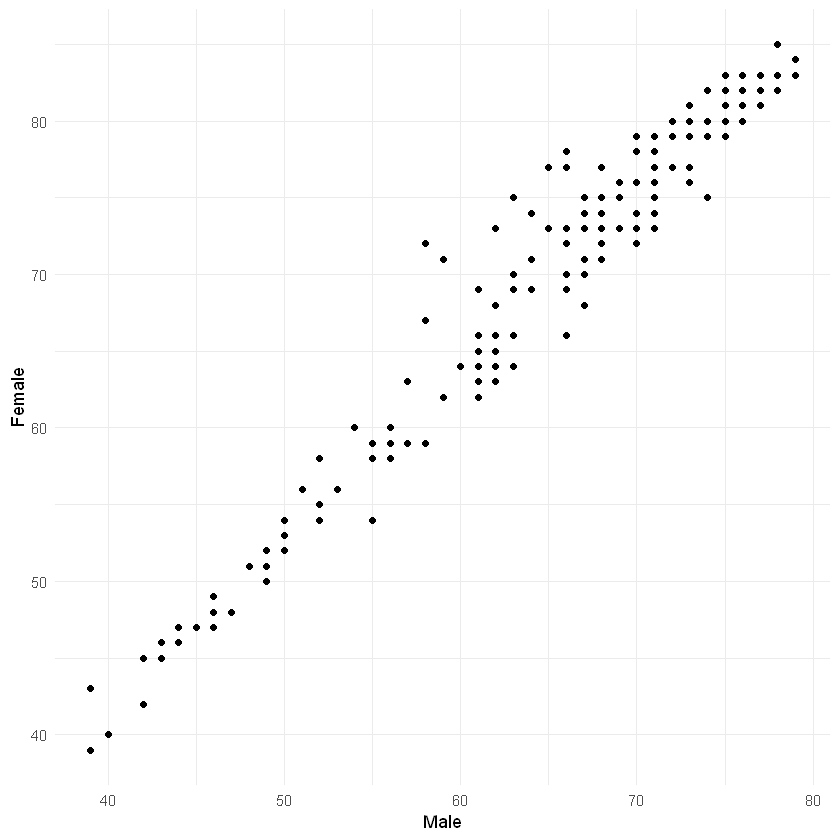

In [6]:
# Plotting male and female life expectancy
ggplot(subdata) + geom_point(aes(x = Male, y = Female)) + theme_minimal()

## Adding Reference Lines

To make our plot more understandable, 
- set the same limits for both axes 
- placed a diagonal line for reference. After doing this, the difference between men and women across countries will be 
  easier to interpret and it is clearly visible how most of the points are arranged above the diagonal and how there is a 
  significant dispersion among them

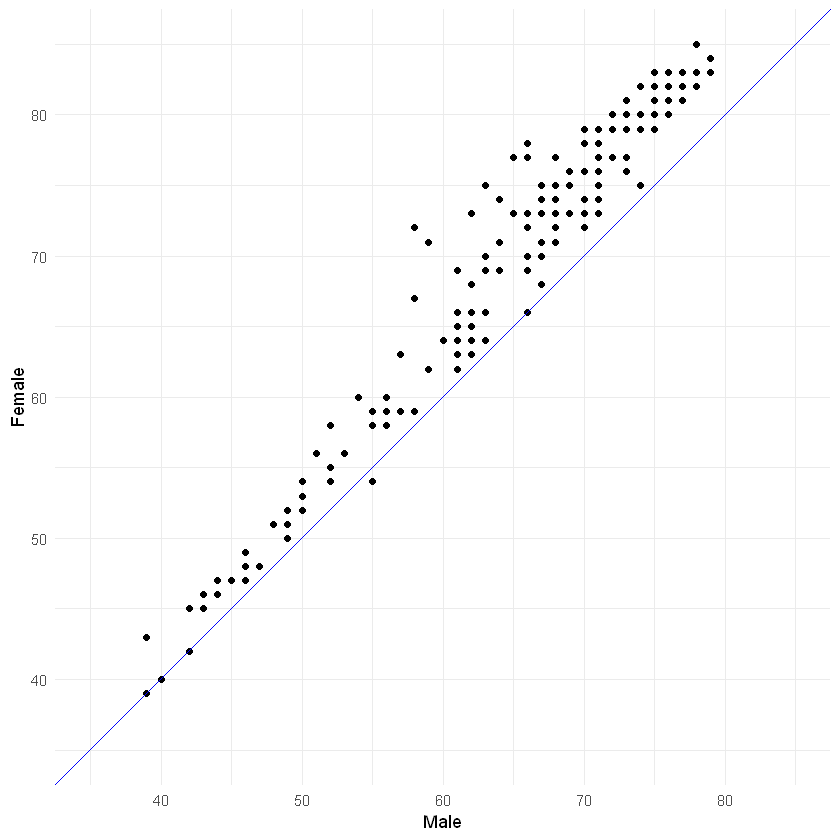

In [7]:
# Adding an abline and changing the scale of axes of the previous plots
ggplot(subdata) + geom_point(aes(x = Male, y = Female)) +
  geom_abline(slope = 1, intercept = 0, col = 'blue') +
  coord_cartesian(xlim =c(35, 85), ylim = c(35, 85)) +
  theme_minimal()

## Adding Plot titles and Axis labels

To clearly define our plot, titles, axis labels, and a caption were added to refer to the source of data.

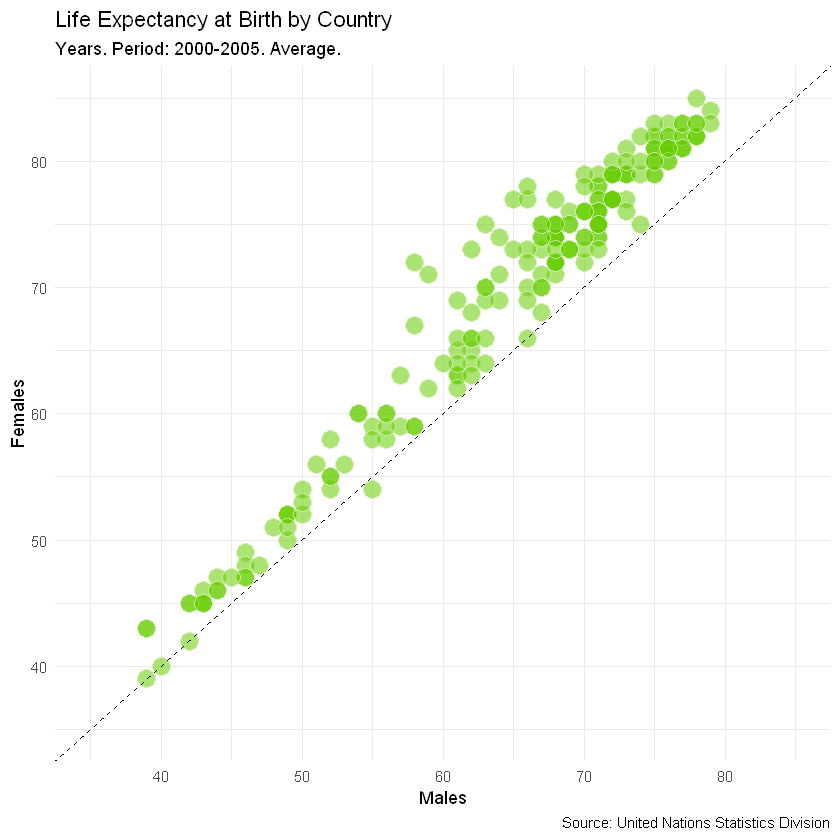

In [9]:
# Adding labels to previous plot
ggplot(subdata, aes(x=Male, y=Female))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x='Males',
       y='Females') + 
  theme_minimal()

## Highlighting remarkable countries

To draw attention to countries where the gap in life expectancy between men and women is significantly high, we specially labelled some points of our plot with the name of its corresponding country. 

In [11]:
# Subseting data to obtain countries of interest
top_male <- subdata %>% arrange(Male-Female) %>% head(3)
top_female <- subdata %>% arrange(Female-Male) %>% head(3)

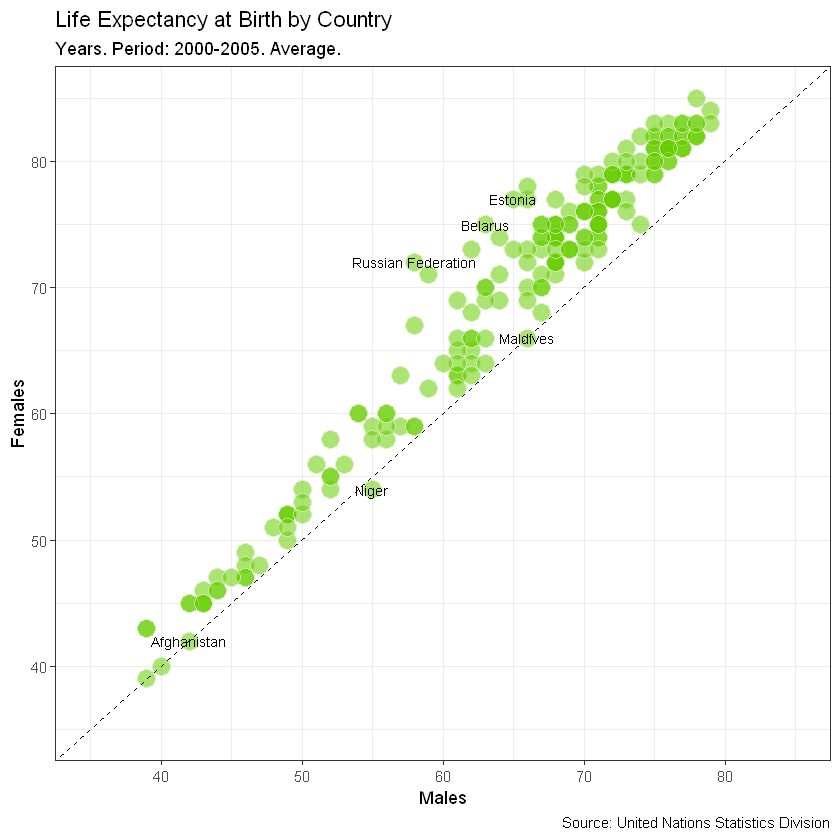

In [13]:
# Adding text to the previous plot to label countries of interest
ggplot(subdata, aes(x=Male, y=Female, label = Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(35,85))+
  scale_y_continuous(limits=c(35,85))+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Period: 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data=top_male, size=3) +
  geom_text(data=top_female, size=3) + 
  theme_bw()

## How has life expectancy by gender evolved?

Since the data contains historical information, evolution of life expectancy through the years can be observed. Next plot represents the difference between men and women across countries between two periods: 2000-2005 and 1985-1990.

Another data set called subdata2 was built for a second plot as demonstrated below:

In [14]:
# Subsetting, mutating and reshaping the life expectancy data
subdata2 <- UNdata_life_expectancy %>% 
  filter(Year %in% c("1985-1990", "2000-2005")) %>% 
  mutate(Sub_Year=paste(Subgroup, Year, sep="_")) %>% 
  mutate(Sub_Year=gsub("-", "_", Sub_Year)) %>% 
  select(-Subgroup, -Year) %>% 
  spread(Sub_Year, Value) %>%
  mutate(diff_Female = Female_2000_2005 - Female_1985_1990,
         diff_Male = Male_2000_2005 - Male_1985_1990)

## Visualization

Based on the above subdata2, a second plot representing average life expectancy differences between "1985-1990" and "2000-2005" for men and women was built.

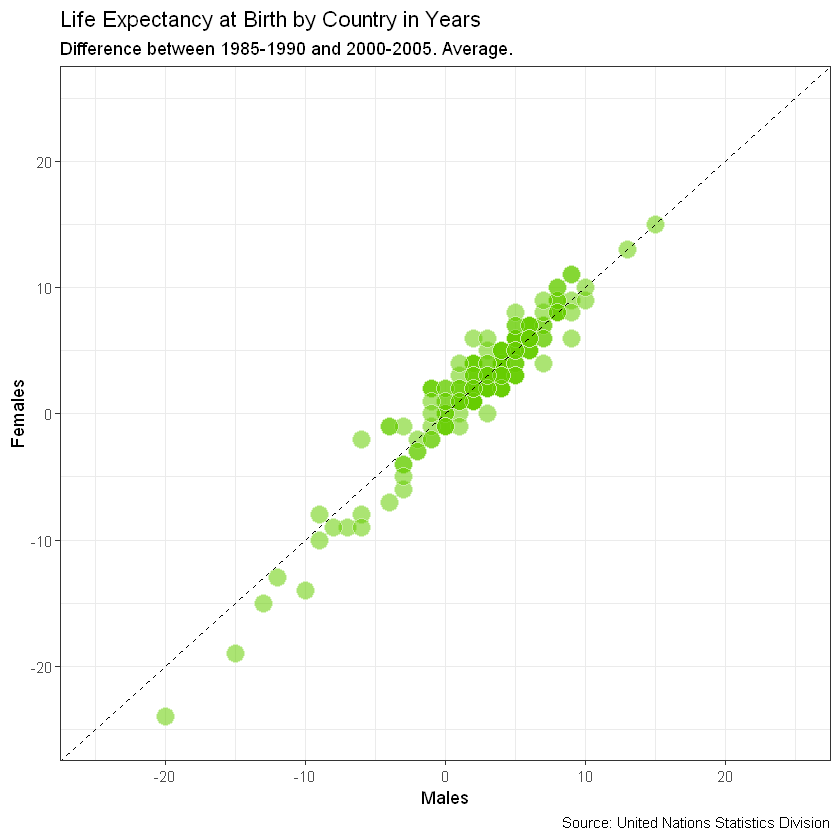

In [15]:
# Doing a nice first version of the plot with abline, scaling axis and adding labels
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limit = c(-25, 25)) + 
  scale_y_continuous(limit = c(-25, 25)) +
  labs(title="Life Expectancy at Birth by Country in Years",
       subtitle="Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  theme_bw()

## Adding Reference lines

Adding reference lines can make plots easier to understand. The above plot already has a diagonal line to visualize differences between men and women more clearly. In addition, two more lines were added (as shown below) to help to identify in which countries people increased or decreased their life expectancy in the period analyzed.

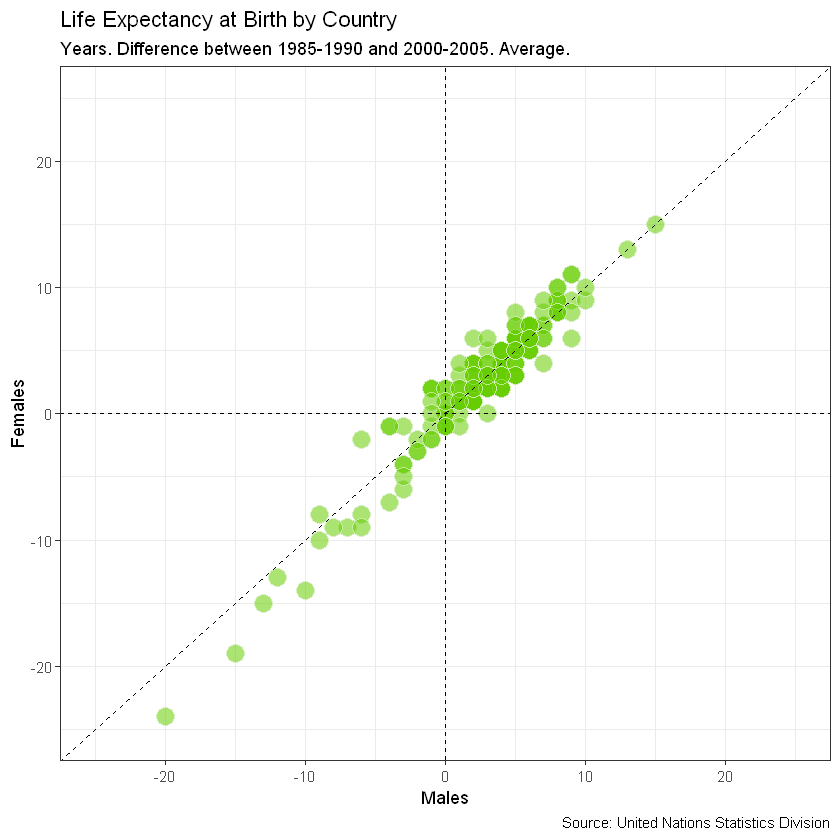

In [17]:
# Adding an hline and vline to previous plots
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area))+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept = 0, linetype = 2) +
  geom_vline(xintercept = 0, linetype = 2)+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  theme_bw()

## Highlighting remarkable countries

The plot was labelled to point the three countries where the aggregated average life expectancy for men and women increased most and the three where decreased most in the period.

In [18]:
# Subseting data to obtain countries of interest
top <- subdata2 %>% arrange(diff_Male+diff_Female) %>% head(3)
bottom <- subdata2 %>% arrange(diff_Male+diff_Female) %>% tail(3)


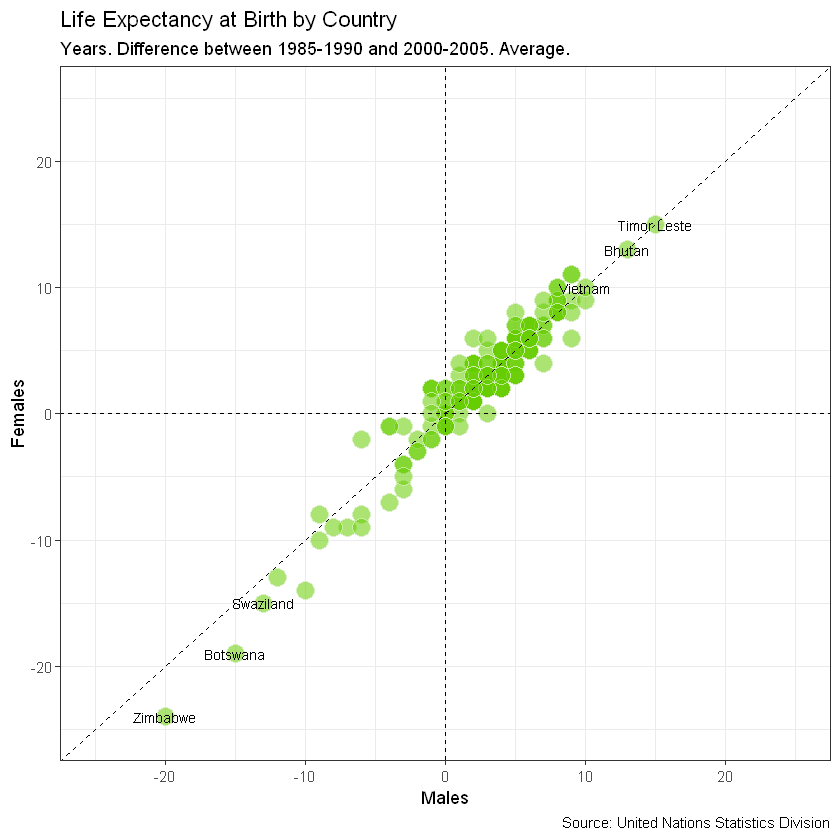

In [19]:
# Adding text to the previous plot to label countries of interest
ggplot(subdata2, aes(x=diff_Male, y=diff_Female, label=Country.or.Area), guide=FALSE)+
  geom_point(colour="white", fill="chartreuse3", shape=21, alpha=.55, size=5)+
  geom_abline(intercept = 0, slope = 1, linetype=2)+
  scale_x_continuous(limits=c(-25,25))+
  scale_y_continuous(limits=c(-25,25))+
  geom_hline(yintercept=0, linetype=2)+
  geom_vline(xintercept=0, linetype=2)+
  labs(title="Life Expectancy at Birth by Country",
       subtitle="Years. Difference between 1985-1990 and 2000-2005. Average.",
       caption="Source: United Nations Statistics Division",
       x="Males",
       y="Females")+
  geom_text(data = top, size = 3) +
  geom_text(data = bottom, size = 3)+
  theme_bw()

                                                                                                  Project done by Barkha Pandey

                                                                                                              source: Data Camp